# Initial Data Cleansing, EDA and Modelling
### 

In [324]:
# for data manipulation and analysis

import numpy as np
import pandas as pd

# visualisation tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats

# ML libraries
# not needed for now

### Importing the data:

In [325]:
data = pd.read_csv('data_uncleaned/train.csv', low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### Checking the shape of the dataset and missing values:

In [326]:
data.shape

(100000, 28)

The DataFrame comprises of 100,000 rows and 28 columns, each representing a certain feature of the dataset. Below a brief explanation of each column is demontrated:

- Index: A default column provided by pandas, serving as a unique identifier for each row.
- ID: Object type column which presumably contains unique identifiers for something, possibly transactions.
- Customer_ID: Object type column generally holding unique identifiers for customers.
- Month: A string that symbolically represents the creation date of the record.
- Name: The names of individuals which seems to have 9985 missing values.
- Age: Likely representing the ages of individuals.
- SSN: Contains the Social Security Number, a unique number identifying each individual.
- Occupation: Likely holds informations regarding the occupations of the customers.
- Annual_Income: A string representation of an individual's annual income.
- Monthly_Inhand_Salary: A numerical representation of the monthly salary with a mean of around 4194.2, potentially representing real-world currency. It has 15,002 missing values.
- Num_Bank_Accounts: A numerical representation of the number of bank accounts. On average, people in this dataset have around 17 bank accounts which seems very high.
- Num_Credit_Card: Average number of credit cards held is about 22.5.
- Interest_Rate: Interest rates are on average about 72.5%.
- Num_of_Loan: The number of loans held by customers.
- Type_of_Loan: The type of loans held by customers. This column has 11,408 missing values.
- Delay_from_due_date: The number of days of delay from the due date; averages around 21.1 days.
- Num_of_Delayed_Payment: Number of payments that were delayed. This column has 7002 missing values.
- Changed_Credit_Limit: This presumably holds whether the credit limit for customers was changed.
- Num_Credit_Inquiries: The number of credit inquiries, with an average of around 27.8 inquiries. This column has 1965 missing entries.
- Credit_Mix: Likely the type of credit in use.
- Outstanding_Debt: Contains the outstanding debts for customers.
- Credit_Utilization_Ratio: The ratio of the amount of credit used out of the available credit, with customers using an average around 32.3% of their available credit.
- Credit_History_Age: Perhaps the age of the longest held credit account. This column has 9030 missing entries.
- Payment_of_Min_Amount: Whether the customers paid their minimum due on time or not.
- Total_EMI_per_month: The total EMI amount per month, averaged to about 1403.1.
- Amount_invested_monthly: The amount invested every month by customers. This column has 4479 missing entries.
- Payment_Behaviour: The payment behaviour of the customer.
- Monthly_Balance: The monthly balance of the customers. This column has 1200 missing entries.
- Credit_Score: The credit score of the customers.

Initial Check of missing values:

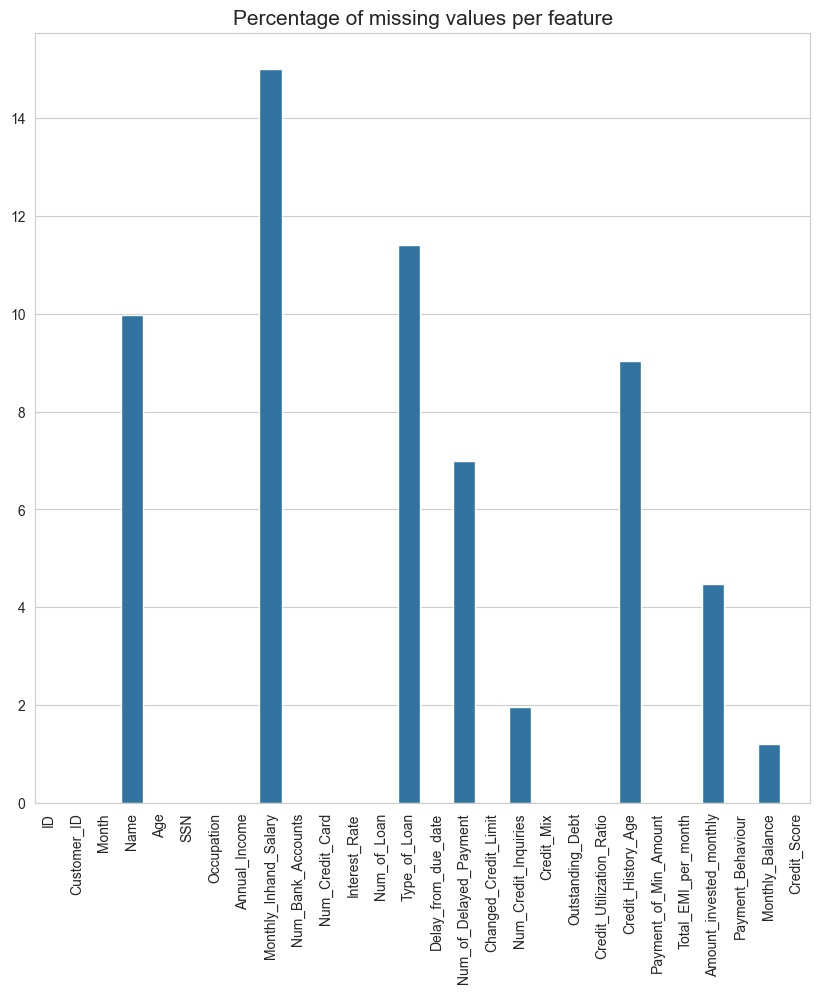

In [327]:
# percentage of missing values plot
plt.figure(figsize=(10,10))
plt.title('Percentage of missing values per feature', fontsize=15)
sns.barplot(data.isnull().mean() * 100)
plt.xticks(rotation=90);

The highest percentage of missing value is 14%. I should investigate if dropping all the rows with missing values is valuable for my analysis:

In [328]:
data_reduced = data.dropna(inplace=False)
data_reduced.shape

(53049, 28)

I reduced the size of the data significantly (From 100000 observations to around 53000). Is this decrease of observations changes the statistical metrics of the data?

In [329]:
# generating descriptive statistics of data dataframe and then transposing the result.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [330]:
data_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,53049.0,4024.502617,3094.967739,303.645417,1575.345833,2991.016667,5712.553333,15204.633333
Num_Bank_Accounts,53049.0,16.842806,115.605025,-1.000000,4.000000,6.000000,8.000000,1798.000000
Num_Credit_Card,53049.0,22.787253,129.339640,0.000000,4.000000,6.000000,7.000000,1499.000000
Interest_Rate,53049.0,76.272352,479.226709,1.000000,8.000000,15.000000,22.000000,5797.000000
Delay_from_due_date,53049.0,21.994119,15.220406,-5.000000,10.000000,19.000000,29.000000,67.000000
Num_Credit_Inquiries,53049.0,27.062866,187.185825,0.000000,3.000000,6.000000,9.000000,2594.000000
Credit_Utilization_Ratio,53049.0,32.219031,5.057398,20.881250,28.046338,32.251786,36.408991,49.564519
Total_EMI_per_month,53049.0,1445.924761,8407.429893,4.462837,41.244418,78.418272,169.286269,82331.000000


**The characteristics of numeric features did not change significantly. As a result I could keep the data_reduced DataFrame from now on.**

In [331]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

Analysing the proportion of values of target variable:

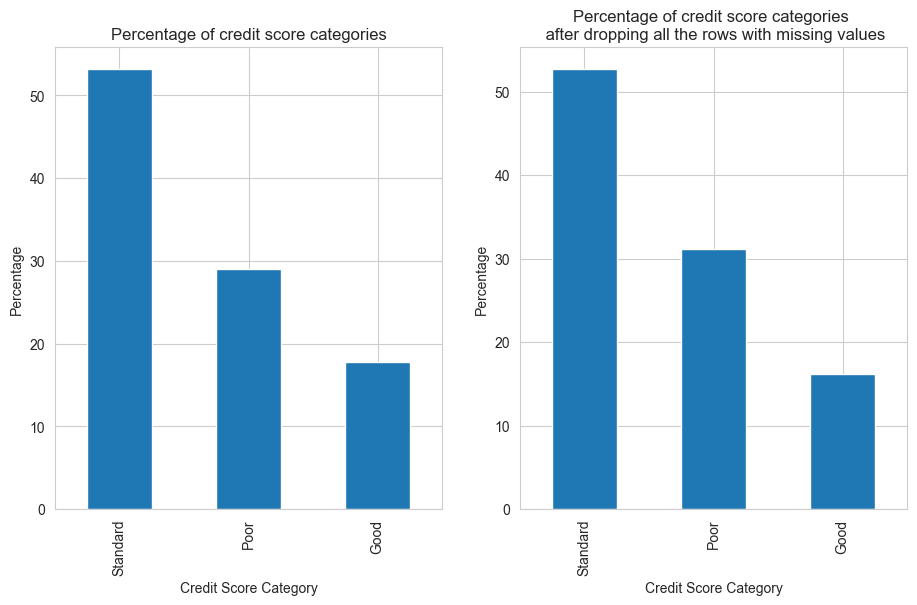

Percentage of credit score categories:
  Credit_Score  proportion
0     Standard      53.174
1         Poor      28.998
2         Good      17.828



Percentage of credit score categories after dropping all the rows with missing values:
  Credit_Score  proportion
0     Standard   52.689023
1         Poor   31.133480
2         Good   16.177496


In [332]:
fig, axs = plt.subplots(1,2, figsize=(11,6))

# Plot for 'data' DataFrame
(data['Credit_Score'].value_counts(normalize = True)*100).plot(kind='bar', ax=axs[0])
axs[0].set_title('Percentage of credit score categories')
axs[0].set_ylabel('Percentage')
axs[0].set_xlabel('Credit Score Category')

# Plot for 'data_reduced' DataFrame
(data_reduced['Credit_Score'].value_counts(normalize = True)*100).plot(kind='bar', ax=axs[1])
axs[1].set_title('Percentage of credit score categories \n after dropping all the rows with missing values')
axs[1].set_ylabel('Percentage')
axs[1].set_xlabel('Credit Score Category')

#plt.tight_layout()
plt.show()

#printing the precentages:
print('Percentage of credit score categories:')
print((data['Credit_Score'].value_counts(normalize = True)*100).reset_index())
print('\n\n')
print('Percentage of credit score categories after dropping all the rows with missing values:')
print((data_reduced['Credit_Score'].value_counts(normalize = True)*100).reset_index())

Detecting strange values apart from the NaN Values ( using data_reduced dataframe)

In [333]:
object_col = data_reduced.describe(include='O').columns
object_col


# data_reduced[col].value_counts(dropna=False): 
# value_counts() is a function that returns the count of unique items in a pandas Series object.
# The argument dropna=False means it includes the NaN (Not a Number) values as well. 
# By default, the value_counts() function does not include NaN values in its count.

# Column Name: 
# '+col: This prints the text 'Column Name: ' along with the name of the column.

for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(data_reduced[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')


Column Name: ID
****************************************
ID
0x1602     1
0x19af2    1
0x19ace    1
0x19ad0    1
0x19ad1    1
          ..
0xda7b     1
0xda7c     1
0xda7d     1
0xda82     1
0x25fed    1
Name: count, Length: 53049, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
Customer_ID
CUS_0x533b    8
CUS_0x912e    8
CUS_0x18ab    8
CUS_0x5794    8
CUS_0xa319    8
             ..
CUS_0xa201    1
CUS_0x72bc    1
CUS_0x6611    1
CUS_0xb367    1
CUS_0x8fee    1
Name: count, Length: 11071, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
Month
January     6744
May         6649
July        6637
June        6629
August      6624
April       6609
February    6589
March       6568
Name: count, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
Name
Stevex                30
Jonathan Stempe

Clear the strange values found above:

In [334]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [335]:
df = data_reduced.map(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                          2971
Occupation                   3727
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         1102
Num_Credit_Inquiries            0
Credit_Mix                  10693
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            3929
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

### Fixing Data Types using value_counts(), astype(), infer_objects(), convert_dtypes() etc.

- Detect strange values by Columns Convert Object Types to Numeric Types (int, float, np.int64, pd.Int64Dtype() )
- Combining object columns


**Changing column type in pandas by using**:

1. astype() - convert (almost) any type to (almost) any other type (even if it's not necessarily sensible to do so). Also allows you to convert to categorial types (very useful).
2. infer_objects() - a utility method to convert object columns holding Python objects to a pandas type if possible.
3. convert_dtypes() - convert DataFrame columns to the "best possible" dtype that supports pd.NA (pandas' object to indicate a missing value).
4. to_numeric() - provides functionality to safely convert non-numeric types.(See also to_datetime() and to_timedelta().)
5. factorize() - provides sorting

In [336]:
# 20 object columns:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       53049 non-null  object
 1   Customer_ID              53049 non-null  object
 2   Month                    53049 non-null  object
 3   Name                     53049 non-null  object
 4   Age                      53049 non-null  object
 5   SSN                      50078 non-null  object
 6   Occupation               49322 non-null  object
 7   Annual_Income            53049 non-null  object
 8   Num_of_Loan              53049 non-null  object
 9   Type_of_Loan             53049 non-null  object
 10  Num_of_Delayed_Payment   53049 non-null  object
 11  Changed_Credit_Limit     51947 non-null  object
 12  Credit_Mix               42356 non-null  object
 13  Outstanding_Debt         53049 non-null  object
 14  Credit_History_Age       53049 non-null  ob

This code below is performing different data transformations on each object column of the df DataFrame, using various functions available in Pandas and Numpy. Here's a breakdown of these operations:

1. **df['ID'] = df.ID.apply(lambda x: int(x, 16)):**
The hexadecimal string IDs are being converted to int type. If df['ID'] originally contains hexadecimal numbers stored as string format, this line will convert those hexadecimal numbers to decimal integers.

2. **df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16)):**
Here it's slicing Customer_ID values from the 5th character till the end and converting those hexadecimal strings to int type.

3. **df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month:**
This line is converting the Month column to Pandas datetime format, with the assumption that df['Month'] are given as full month names ('January', 'February', etc.). It then extracts the month as an integer (1 for January, 2 for February, etc.).

4. **df['Age'] = df.Age.astype(int):** 
This line is converting the Age column values into integers using the astype(int) function.

5. **df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float):**
Here, for each value in the SSN field, if the value is not NaN (Not a Number), it is converted to string format, and then all the hyphen ('-') characters are removed. The resulting string is converted to an integer and then to a float. If the value is NaN, it remains NaN.

- 6-12. **For numerical columns 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', and 'Monthly_Balance'**, the DataFrame's astype method is used to convert these columns to the float or int data type.

In summary, the below code does type conversion and data cleaning for specific columns of the df pandas DataFrame. The cleaning and transformation done here are necessary for a lot of data processing and machine learning tasks.

In [337]:
df['ID']                      = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']                     = df.Age.astype(int)
df['SSN']                     = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

### Combining specific object columns

#### Feature: Credit History Age

This function below, named **Month_Converter**, takes a single argument x. The function is intended to convert a string representing a time period in years and months into total months. The function does the following:

1. **if pd.notnull(x)**:
The function first checks if x is not a null value. This is done using the function notnull() from the pandas library.
2. **num1 = int(x.split(' ')[0])**:
It assumes that x is a string in which the first portion before the space is the number of years. It splits the string into different parts at the spaces using split(' '), and it converts the first part num1 (which is the number of years) into an integer.
3. **num2 = int(x.split(' ')[3]):** 
Similar to the previous step, it assumes the string follows a pattern where the 4th portion (index 3) after splitting by space is the number of months. It converts this part num2 into an integer.
4. **return (num1*12)+num2:**
It returns the total number of months by converting the years into months (num1*12) and adding the remaining months (num2).
5. **else: return x:**
If x is a null value, the function simply returns x. This is useful for handling missing data.


The function expects input strings in the format "5 years 2 months" and converts them into an integer representing the total number of months (in this example, it would return 62).

Do note that this function does not handle errors that might arise if the format of the string is not as expected. It's best to make sure the data fits the expected format before applying this function.

In [338]:
def Month_Converter(x):
    """
    Converts a given month in the format "Mmm yyyy" to the total number of months

    :param x: A string representing a month in the format "Mmm yyyy" (e.g. "Jan 2022")
    :return: The total number of months corresponding to the given month (e.g. for "Jan 2022", it would be 20234)
    """
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x


In [339]:
#applying function Month_Converter to 'Credit_History_Age':
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

#check
df.groupby('Customer_ID')['Credit_History_Age'].apply(list).head()

Customer_ID
1006                  [183.0, 184.0, 185.0, 187.0, 188.0]
1007                                       [347.0, 349.0]
1009    [331.0, 332.0, 333.0, 334.0, 335.0, 337.0, 338.0]
1011                                [179.0, 183.0, 185.0]
1013    [311.0, 313.0, 314.0, 315.0, 316.0, 317.0, 318.0]
Name: Credit_History_Age, dtype: object

#### Feature: Type of Loan

In [340]:
df['Type_of_Loan'].value_counts(dropna=False)

Type_of_Loan
Not Specified                                                                                                                      874
Credit-Builder Loan                                                                                                                800
Personal Loan                                                                                                                      793
Debt Consolidation Loan                                                                                                            759
Student Loan                                                                                                                       751
                                                                                                                                  ... 
Credit-Builder Loan, Home Equity Loan, Home Equity Loan, and Not Specified                                                           1
Payday Loan, Home Equity Loan, Auto Loan, 

The code below contains two lines where the Pandas library in Python is used to process the DataFrame df.

**The applied lambda function does the following**:
- x.lower() - This part transforms the text to lowercase.
- .replace('and ', '') - This part removes the word 'and' followed by a space from the string.
- .replace(', ', ',') - This part replaces the ', ' (comma followed by a space) with ',' (just comma), effectively removing spaces after commas.
- .strip() - This part removes any leading or trailing spaces.
- If x is a NaN value (checked using the pd.notna(x) else x part), it remains unaltered.
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

The next code line groups the DataFrame by the Customer_ID, then takes the count of unique values in the Type_of_Loan column for each Customer_ID. The value_counts(dropna=False) function counts the number of each unique value in the Type_of_Loan column. The dropna=False parameter means it includes the NaN values in the count.

In summary, the code first cleans up and standardizes the Type_of_Loan column, then displays the occurrence of each type of loan per customer

In [341]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                
1006         credit-builder loan,payday loan                                                                 5
1007         home equity loan,mortgage loan,student loan                                                     2
1009         credit-builder loan,student loan,not specified,student loan                                     7
1011         personal loan,auto loan,auto loan                                                               3
1013         home equity loan,mortgage loan,not specified,personal loan                                      7
                                                                                                            ..
50983        student loan,mortgage loan                                                                      3
50984        home equity loan,mortgage loan,payday loan,mortgage loan,mortgage loan,payday loan              4
50990 

Also, I could create lists of type of loans per Customer ID, where I can map the values inside the lists into different features

In [342]:
df.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [credit-builder loan,payday loan, credit-build...
1007     [home equity loan,mortgage loan,student loan, ...
1009     [credit-builder loan,student loan,not specifie...
1011     [personal loan,auto loan,auto loan, personal l...
1013     [home equity loan,mortgage loan,not specified,...
                               ...                        
50983    [student loan,mortgage loan, student loan,mort...
50984    [home equity loan,mortgage loan,payday loan,mo...
50990    [mortgage loan,auto loan,auto loan, mortgage l...
50992    [student loan,credit-builder loan,mortgage loa...
50999    [credit-builder loan, credit-builder loan, cre...
Name: Type_of_Loan, Length: 11071, dtype: object

Let's check the different values in the Type of Loan column:

In [343]:
import re 
def get_Diff_Values_Colum(df_column, diff_value=[], sep=',', replace=''):
    """
    Get the different values in a column of a DataFrame.

    :param df_column: The column of the DataFrame.
    :type df_column: pandas.Series
    :param diff_value: Values to exclude from the result. It is an optional parameter and the default value is an empty list.
    :type diff_value: list, optional
    :param sep: Separator for splitting values that contain multiple elements. It is an optional parameter and the default value is ','.
    :type sep: str, optional
    :param replace: Characters to replace in values before processing. It is an optional parameter and the default value is an empty string.
    :type replace: str, optional
    :return: A dictionary containing the different values as keys and their corresponding indexes as values.
    :rtype: dict

    """
    column = df_column.dropna()
    for i in column:
        if sep not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), re.sub(replace, '', i).split(sep)):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [344]:
get_Diff_Values_Colum(df['Type_of_Loan'])

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

We have 8 unique values  various combinations in column: Type_of_Loans

### Handling missing values on df Dataframe

In [345]:
df.select_dtypes(include = 'object').isna().sum()

Name                         0
Occupation                3727
Type_of_Loan                 0
Credit_Mix               10693
Payment_of_Min_Amount        0
Payment_Behaviour         3929
Credit_Score                 0
dtype: int64

I should check and handle tha Nan values of the following variables:
- Occupation
- Credit_Mix
- Payment_Behaviour

Below I create a function that handles missing values for Object Columns:


**The below function is defined to handle missing values (NaNs) in a pandas DataFrame based on the mode of a grouped column**.

**Here's a breakdown of the code**:

The function first defines a nested inner function make_NaN_and_fill_mode which replaces 'None' values with 'np.NaN' if any. Then, it fills the missing values with the mode of the column, grouped by the column names stated. The mode is the value that appears most frequently in a data set. It's calculated using scipy.stats.mode.

When the inplace argument is True, the original DataFrame is modified and nothing is returned. If False, a new DataFrame with the modifications is returned.
The primary function checks if inplace is True or False.

If inplace is True, it:
- calculates and prints the count of NaN values in the column before assigning.
- shows a sample of values in the group by column,
- replaces None and NaN values with the mode value using the inner function,
- shows the count of NaN values in the column after assigning,
- shows a sample of the group by column after assigning.

If inplace is False, it simply calls the make_NaN_and_fill_mode function and returns the modified DataFrame.

In [346]:
# Reassign and Show Function
def Object_NaN_Values_Reassign(df, groupby, column, inplace=True):
    """
    :param df: The DataFrame to be modified.
    :param groupby: The column(s) to group the data by.
    :param column: The column to reassign NaN values.
    :param inplace: If True, modify the DataFrame in-place. If False, return a new DataFrame with the NaN values reassigned.
    :return: If inplace=True, returns None. If inplace=False, returns a DataFrame with reassigned NaN values.

    This method reassigns NaN values in a DataFrame column based on the mode of the corresponding groupby column(s).
    """
    import scipy.stats as stats
    import pandas as pd
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN

        # fill with local mode
        mode_vals = df.groupby(groupby)[column].apply(lambda x: pd.Series.mode(x)[0] if len(pd.Series.mode(x))>0 else np.NaN)

        result = df[column].fillna(df[groupby].map(mode_vals))

        # inplace
        if inplace:
            df[column]=result
        else:
            return result

    # Run      
    if inplace:
        # Before Assigning NaN values   
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)

        # After Assigning NaN values
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nAfter Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

**Handling Occupation variable**:

In [347]:
df['Occupation'].value_counts(dropna=False)

Occupation
NaN              3727
Lawyer           3558
Mechanic         3419
Doctor           3344
Teacher          3341
Entrepreneur     3326
Architect        3325
Engineer         3321
Media_Manager    3306
Accountant       3305
Scientist        3281
Developer        3279
Writer           3150
Musician         3136
Journalist       3124
Manager          3107
Name: count, dtype: int64

In [348]:
Object_NaN_Values_Reassign(df, 'Customer_ID', 'Occupation')


Before Assigning: Occupation: have 3727 NaN Values

Before Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', nan, 'Journalist']
['Manager', 'Manager']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
['Writer', nan, 'Writer']
[nan, 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic']

After Assigning: Occupation: have 8 NaN Values

After Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager']
['Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer']
['Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic']


**Everything seems ok. Now I should check Credit_Mix feature**:

In [349]:
df['Credit_Mix'].value_counts(dropna=False)

Credit_Mix
Standard    19418
Good        11612
Bad         11326
NaN         10693
Name: count, dtype: int64

In [350]:
Object_NaN_Values_Reassign(df, 'Customer_ID', 'Credit_Mix')


Before Assigning: Credit_Mix: have 10693 NaN Values

Before Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', nan, 'Standard']
['Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard']
[nan, nan, 'Good', 'Good', nan, 'Good', nan]

After Assigning: Credit_Mix: have 97 NaN Values

After Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']


In [351]:
df['Credit_Mix'].value_counts(dropna=False)

Credit_Mix
Standard    24362
Good        14442
Bad         14148
NaN            97
Name: count, dtype: int64

**In a similar way I handle the missing values of Payment_Behaviour**:

In [352]:
Object_NaN_Values_Reassign(df, 'Customer_ID', 'Payment_Behaviour')


Before Assigning: Payment_Behaviour: have 3929 NaN Values

Before Assigning Example Payment_Behaviour:

['Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', nan, 'Low_spent_Large_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', nan, 'High_spent_Large_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'High_spent_Large_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments']

After Assigning: Payment_Behaviour: have 18 NaN Values

After Assigning Example Payment_Behaviour:

['Low_spent_Medium_value_payments', 'Low_s

In [353]:
#check the null values:
df.select_dtypes(include = 'object').isna().sum()

Name                      0
Occupation                8
Type_of_Loan              0
Credit_Mix               97
Payment_of_Min_Amount     0
Payment_Behaviour        18
Credit_Score              0
dtype: int64

### Handling numeric variables (missing values and outliers)

Below I create a function that gets the lower and upper bounds for outliers based on the interquartile range (IQR). 

In [372]:
# Define Outlier Range
def get_iqr_lower_upper(df, column, multiply=1.5):
    """
    Get the lower and upper bounds for outliers based on the interquartile range (IQR).

    :param df: pandas DataFrame
        The DataFrame containing the data.
    :param column: str
        The column name in the DataFrame.
    :param multiply: float, optional
        The multiplier to determine the threshold for outliers. Default is 1.5.
    :return: tuple
        A tuple containing the lower and upper bounds for outliers.
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1

    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outlier.shape:', affect)
    return lower, upper

Also, I create a function for numeric variables that identifies and re-assigns wrong numeric values in the df DataFrame based on a specified group:

In [373]:
# Reassign Wrong Values and Show Function
def Numeric_Wrong_Values_Reassign_Group_Min_Max(df, groupby, column, inplace=True):
    """

    This method, `Numeric_Wrong_Values_Reassign_Group_Min_Max`, is used to identify and reassign wrong numeric values in a pandas DataFrame based on a specified group. 

    :param df: The pandas DataFrame where the wrong values need to be re-assigned. 
    :param groupby: The column(s) in the DataFrame that will be used to group the data.
    :param column: The column containing the values that need to be reassigned.
    :param inplace: A boolean indicating whether the changes should be made directly in the DataFrame or returned as a new object. Default is True, which means the changes will be made inplace
    *.
    :return: If `inplace` is True, there is no return value. If `inplace` is False, the modified DataFrame will be returned.

    """
    import scipy.stats as stats

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0], y[0]

    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0], y[0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result


    # Run      
    if inplace:
        # Before Assigning NaN values   
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
        mini, maxi = get_group_min_max(df, groupby, column)
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)

        # After Assigning NaN values
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

In [374]:
column = 'Age'
groupby = 'Customer_ID'
cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
x[0]

-500.0

Choosing the numeric variables that will be checked and transformed based on the above function. I will exclude SSN, ID and Customer_ID:

In [375]:
cols_to_exclude = ['ID', 'Customer_ID', 'SSN']
df_columns = df.select_dtypes(include=['int64', 'float64']).columns

filtered_columns = [col for col in df_columns if col not in cols_to_exclude]

print('Selected numeric Features:\n')
print(filtered_columns)

Selected numeric Features:

['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [376]:
#checking the first 5 values per column:
df[filtered_columns].head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
6,23.0,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,4.0,809.98,22.537593,271.0,49.574949,178.344067,244.565317
8,28.0,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,605.03,24.464031,319.0,18.816215,104.291825,470.690627
9,28.0,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,2.0,605.03,38.550848,320.0,18.816215,40.391238,484.591214
10,28.0,34847.84,3037.986667,2,1385,6,1,3,-1.0,5.42,2.0,605.03,33.224951,321.0,18.816215,58.515976,466.466476


Checking columns for Outliers:

In [377]:
get_iqr_lower_upper(df, 'Age', multiply=1.0)

Outlier.shape: (985, 28)


(7.0, 58.0)

In [378]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Age')


Existing Min, Max Values:
min    -500.0
max    4390.0
Name: Age, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-500.0,
max:	4390.0

Before Assigning Example Age:

[38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
[43.0, 44.0, 44.0]
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]

After Assigning Example Age:

[38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
[43.0, 44.0, 44.0]
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]


In [370]:
df['Age'].min()

-500.0